In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
housing = pd.read_csv("housing.csv")  # kaggle dataset

In [3]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
housing.isnull().sum()   # no missing values in this datset

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [5]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


<Axes: >

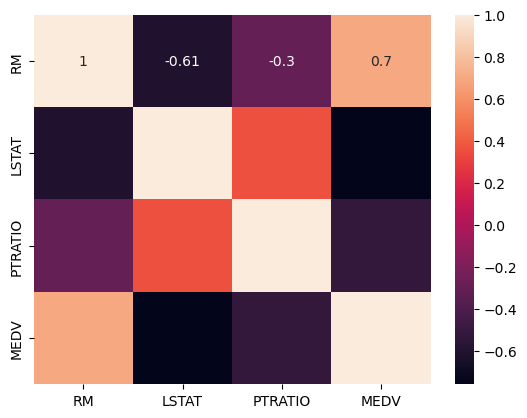

In [6]:
# correlation matrix - to measure the linear relationship between variables
# number close to 1 = positive correlation

correlation_matrix = housing.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

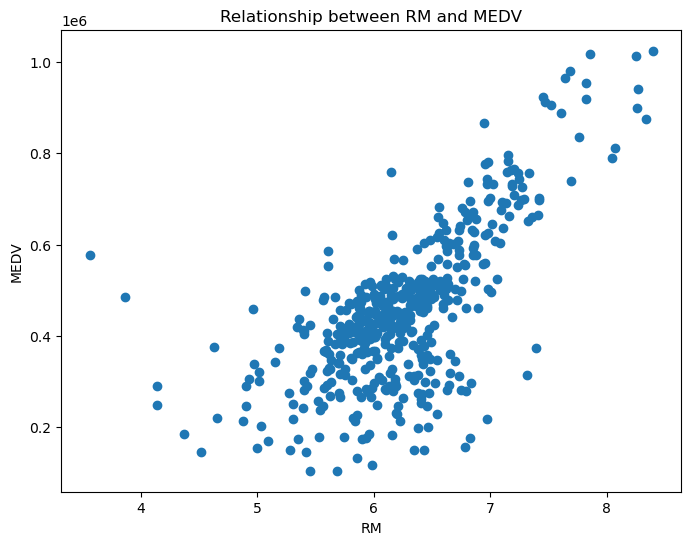

In [7]:
# RM has 0.7 with MEDV

plt.figure(figsize=(8, 6))

feature = housing['RM']
target = housing['MEDV']

plt.scatter(feature, target, marker='o')
plt.title('Relationship between RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

plt.show()

# prices increases as RM increases, linear relationship

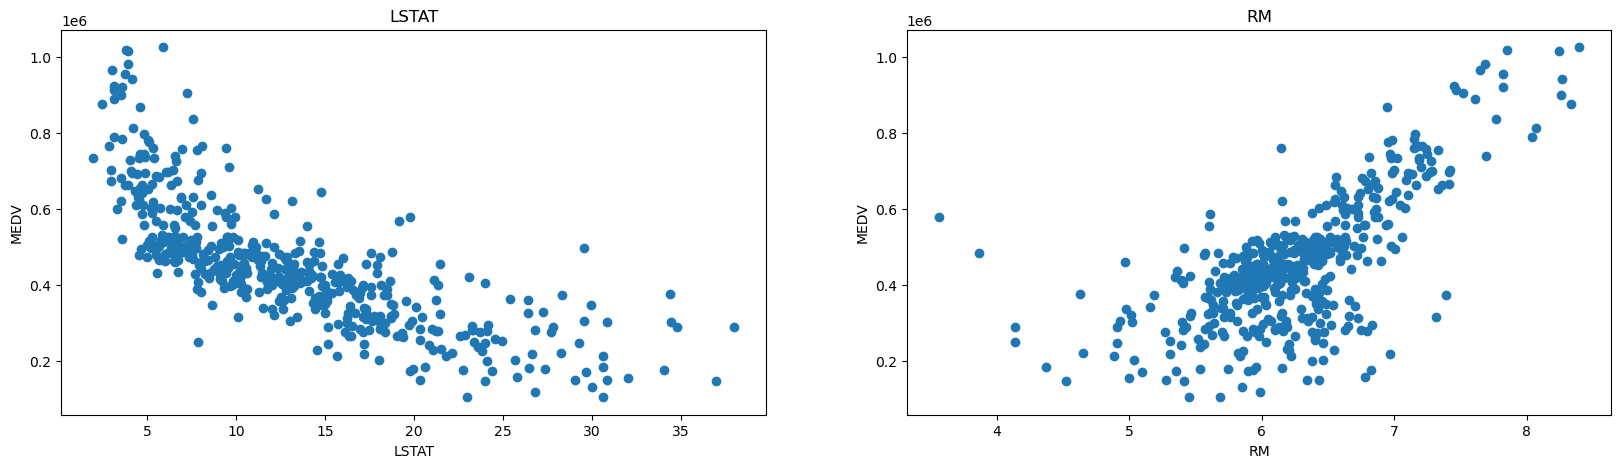

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = housing['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


# prices decreasing as LSTAT is incresing

In [9]:
X = housing['RM']
Y = housing['MEDV']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(391,)
(98,)
(391,)
(98,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Model evaluation for training set
y_train_predict = model.predict(X_train)
mse_train = mean_squared_error(Y_train, y_train_predict)
rmse_train = np.sqrt(mse_train)
print('RMSE for Training Set:', rmse_train)

# Model evaluation for testing set
y_test_predict = model.predict(X_test)
mse_test = mean_squared_error(Y_test, y_test_predict)
rmse_test = np.sqrt(mse_test)
print('RMSE for Testing Set:', rmse_test)

RMSE for Training Set: 118500.26358172036
RMSE for Testing Set: 118331.54438674482
